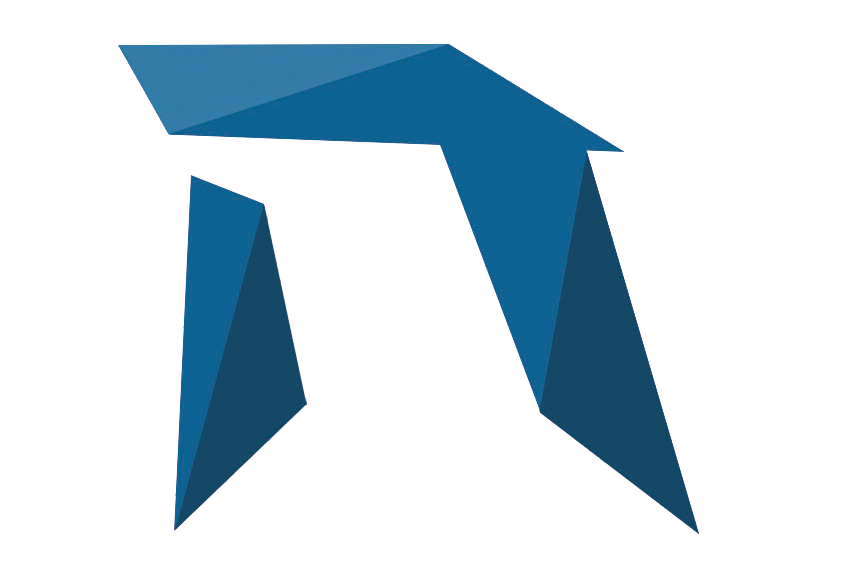

***
# HEICODERS ACADEMY
<b>AI100: Python Programming & Data Visualisation</b><br>
***
<b>Take-Home Project:</b> HDB Resale Analysis [25 Marks]
***

<b>Dataset Used:</b>

- HDB Resale Data from January 2017 to June 2020 (Adapted from [data.gov.sg](https://data.gov.sg/dataset/resale-flat-prices))

<b>Note:</b>

- This exercise consolidates your learning outcomes from Lessons 1 to 7, and accounts for 25% of the entire course [25 marks]
- To help you check your answers, we have provided the expected outputs for each question.
- A sizable number of the questions are related, so for each question, we have provided the necessary inputs to ensure you do not get penalised if you cannot do the earlier questions.
- Hints are provided for some questions only as a last resort. You are **highly recommended** to attempt the questions first before peeking at them.
- Lastly, have fun, and approach your assigned TA if you need help!

<div class="alert alert-block alert-success">
<b>Student Score:</b> / 25 mark
  
<b>Teaching Assistant Comment:</b>
</div>    

<div class="alert alert-block alert-warning">

<b>Before you submit</b>
- <b>Student Name:</b> _Fill in your name here_
- _Rename this Jupyter Notebook in the following format before you submit it_ e.g. `John_Doe_Project.ipynb`
    
    
    FirstName_LastName_Project.ipynb

        
</div>

<b>Content</b>

- [1.HDB Resale Data Analytics](#1.HDB-Resale-Data-Analytics)
    - [1a. Background of HDB Resale Capstone Project](#1a.-Background-of-HDB-Resale-Capstone-Project)
    - [1b. Loading the Dataset](#1b.-Loading-the-Dataset)
    - [1c. Data Cleaning](#1c.-Data-Cleaning)
- [2.Data Preparation & Visualisation](#2.Data-Preparation-&-Visualisation)
    - [2a. Question 1: Calculate the Number of Resale Flats in Each Town [2 Marks]](#2a.-Question-1:-Calculate-the-Number-of-Resale-Flats-in-Each-Town-[2-Marks])
    - [2b. Question 2: Visualise the Number of Resale Flats in Each Town [2 Marks]](#2b.-Question-2:-Visualise-the-Number-of-Resale-Flats-in-Each-Town-[2-Marks])
    - [2c. Question 3: Calculate the Total Sale Value in Each Town [2 Marks]](#2c.-Question-3:-Calculate-the-Total-Sale-Value-in-Each-Town-[2-Marks])
    - [2d. Question 4: Calculate the Average Resale Value in Each Town [2 Marks]](#2d.-Question-4:-Calculate-the-Average-Resale-Value-in-Each-Town-[2-Marks])
    - [2e. Question 5: Visualise the Average Resale Value in Each Town [2 Marks]](#2e.-Question-5:-Visualise-the-Average-Resale-Value-in-Each-Town-[2-Marks])
    - [2f. Question 6: Is the Lease an Important Factor in the HDB Resale Price [2 Marks]](#2f.-Question-6:-Is-the-Lease-an-Important-Factor-in-the-HDB-Resale-Price-[2-Marks])
    - [2g. Question 7: How does Floor Area Correlate with Resale Price? [3 Marks]](#2g.-Question-7:-How-does-Floor-Area-Correlate-with-Resale-Price?-[3-Marks])
    - [2h. Question 8: Comparing Select 4 Room Flats in Singapore [2 Marks]](#2h.-Question-8:-Comparing-Select-4-Room-Flats-in-Singapore-[2-Marks])
    - [2i. Question 9: Construct a Heatmap of all 4 room resale listings in Singapore [3 Marks]](#2i.-Question-9:-Construct-a-Heatmap-of-all-4-room-resale-listings-in-Singapore-[3-Marks])
    - [2i. Question 10: Construct a Folium Marker Cluster of all 4 room resale listings in Singapore [5 Marks]](#2i.-Question-10:-Construct-a-Folium-Marker-Cluster-of-all-4-room-resale-listings-in-Singapore-[5-Marks])

1.HDB Resale Data Analytics
===
---

1a. Background of HDB Resale Capstone Project
---

Getting a HDB is probably one of the biggest financial decisions many Singaporeans have to make, given its exhorbitant cost. Making a wrong decision could set you back several years in terms of opportunity cost & time value of money. 

<img src='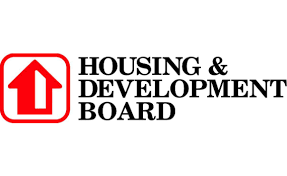
'/>

In this project, we seek to build data visualisation to shed light on the HDB resale market, and provide key consideration parameters to help us make better decisions in choosing a: <br>

(1) HDB Resale flat, or <br>
(2) BTO flats that are likely to appreciate in the resale market

1b. Loading the Dataset
---

We start by first loading the CSV data of Singapore HDB listings (73320 rows × 14 columns) into a nested list, <code>hdb_resale_listings</code>.

**Before you start on the project, please run the cell of code below.**

In [ ]:
# Run this cell to load the HDB listings data into a nested list

import csv

hdb_resale_listings = []

with open('HDB_Resale_With_Geocoordinates.csv', newline='', encoding="utf8") as f:
    reader = csv.reader(f)
    for row in reader:
        hdb_resale_listings.append(row)

    # Remove header
    hdb_resale_listings_headers = hdb_resale_listings[0]
    hdb_resale_listings = hdb_resale_listings[1:]
    
print(hdb_resale_listings[0]) # Print first row of data

For your visualisation, we display a snippet of the <code>hdb_resale_listings</code> nested list in a tabular format. 

In [ ]:
import pandas as pd

hdb_resale_df = pd.read_csv("HDB_Resale_With_Geocoordinates.csv")
hdb_resale_df

1c. Data Cleaning
---

Now let's write a loop to iterate through the data to perform some cleaning. The data columns we will be cleaning are:
- <code>floor_area_sqm</code> (convert to float)
- <code>remaining_lease</code> (extract only the years & convert it to float)
- <code>resale_price</code> (convert to float)
- <code>longitude</code> (convert to float)
- <code>latitude</code> (convert to float)

**Before you start on the project, please run the cell of code below.**

In [ ]:
# Run this cell of code to clean the csv dataset

# Iterate through nested list of HDB resale data
for row in hdb_resale_listings:
    
    # Extract data from specific columns and store into variables for easy access
    floor_area_sqm = row[6]
    lease_remaining = row[9]                 
    resale_price = row[10]
    longitude = row[12]
    latitude = row[13]
    
    row[6] = float(floor_area_sqm)
    
    # If lease_remaining info is of string data type
    if isinstance(lease_remaining,str):
        row[9] = int(lease_remaining[:2]) # Get years of lease remaining with slicing, and convert it to int type
   
    row[10] = float(resale_price)
    
    if longitude == '':
        row[12] = 0
    else:
        row[12] = float(longitude)
        
    if latitude == '':
        row[13] = 0
    else:
        row[13] = float(latitude)

print(hdb_resale_listings[:5]) # Print first 5 rows of data

For your visualisation, we display a snippet of the cleaned data stored in the variable <code>hdb_resale_listings</code> in a tabular format. 

In [ ]:
hdb_resale_df = pd.DataFrame(hdb_resale_listings, columns = hdb_resale_listings_headers)
hdb_resale_df.head()

2.Data Preparation & Visualisation
===
***

2a. Question 1: Calculate the Number of Resale Flats in Each Town [2 Marks]
---

<br>

<div class="alert alert-block alert-info">
    
<b>Background:</b>
    
- The team at HDB has tasked you to answer some analytical queries using the data stored in <code>hdb_resale_listings</code>.
- Let's start by first getting an broad idea of the number of resale flat listings in each planning area or town.
 
<b>User story:</b>
- Tabulate the number of resale listings in each town, and return the counts in descending order.
- Expected output:<br><br>

<div style="margin-left:30px;background:white;">
{'SENGKANG': 5731, 'WOODLANDS': 5585, 'JURONG WEST': 5535, 'YISHUN': 5449, 'TAMPINES': 4679, 'PUNGGOL': 4520, 'BEDOK': 3912, 'HOUGANG': 3443, 'ANG MO KIO': 3313, 'CHOA CHU KANG': 3035, 'BUKIT MERAH': 2873, 'BUKIT PANJANG': 2836, 'BUKIT BATOK': 2724, 'TOA PAYOH': 2425, 'PASIR RIS': 2148, 'KALLANG/WHAMPOA': 2112, 'SEMBAWANG': 1946, 'QUEENSTOWN': 1927, 'GEYLANG': 1759, 'JURONG EAST': 1627, 'CLEMENTI': 1600, 'SERANGOON': 1473, 'BISHAN': 1427, 'CENTRAL AREA': 604, 'MARINE PARADE': 430, 'BUKIT TIMAH': 207}
</div>
    
<br>

<details>
    <summary><b>Reveal Q1 Hint</b> (Make sure to attempt Q1 first)</summary>
    
- How to tabulate counts of resale listings by town (sorted in descending order)? Refer to the following in-class exercises
    - Lesson 4 part 4j(i) on **Compiling Unique Values**
    - Lesson 7 parts 2d & 2e on **Data Exploration (Summary Statistics)**

</details>
    
</div>

In [ ]:
resale_counts_by_town = {}  # Populate this dictionary with counts

## Write your code below
for row in hdb_resale_listings:
    
    town = row[1]
    
    if town in resale_counts_by_town:
        
        resale_counts_by_town[town] += 1
        
    else:
        
        resale_counts_by_town[town] = 1

sorted_towns = sorted(resale_counts_by_town.items(), key=lambda x: x[1], reverse=True)

resale_counts_sorted_desc = dict(sorted_towns)

print(resale_counts_sorted_desc)


<div class="alert alert-block alert-success">
<b>Marks Awarded:</b> / 2 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

2b. Question 2: Visualise the Number of Resale Flats in Each Town [2 Marks]
---

<br>

<div class="alert alert-block alert-info">
    
<b>Background:</b>
    
- You've been tasked by HDB to visualise the number of resale flats in each town.
- While the dictionary you've prepared in Q1 is well and good, it would paint a clearer picture to visualise this data with a chart.
    
<b>User story:</b>
- Using the `resale_counts_sorted_desc` dictionary provided below, create a bar chart that shows the number of resale listings in each town.
- Your x tick labels should also be rotated by 90 degrees for readability. Remember to configure the x-axis label, y-axis label and title as well!
- Expected output:<br><br>

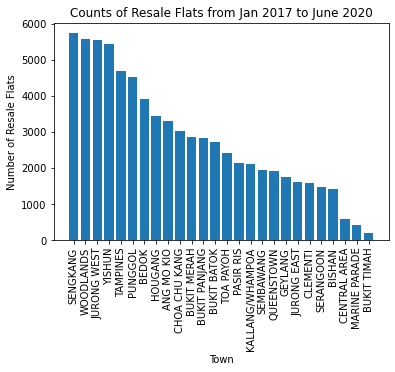

<br>

<details>
    <summary><b>Reveal Q2 Hint</b> (Make sure to attempt Q2 first)</summary>
    
- To create the bar chart, you should *extract the dictionary's keys (towns) and the dictionary's values (counts) into two separate python lists*. The towns serve as *x*-values while the counts as *y*-values in your bar chart.
    - Refer to Lesson 7 part 2e(ii) on **Data Exploration (Summary Statistics)**
    - Alternatively, there are plenty of resources available on Google! Try your hand at searching StackOverflow posts for help:
        - Google 'Extract dictionary keys as python list': [StackOverflow result](https://stackoverflow.com/questions/16819222/how-to-return-dictionary-keys-as-a-list-in-python)
        - Google 'Extract dictionary values as python list': [StackOverflow result](https://stackoverflow.com/questions/16228248/how-can-i-get-list-of-values-from-dict)

</details>

</div>

In [ ]:
# Expected output from Q1
resale_counts_sorted_desc = {'SENGKANG': 5731, 'WOODLANDS': 5585, 'JURONG WEST': 5535, 'YISHUN': 5449, 'TAMPINES': 4679, 'PUNGGOL': 4520, 'BEDOK': 3912, 'HOUGANG': 3443, 'ANG MO KIO': 3313, 'CHOA CHU KANG': 3035, 'BUKIT MERAH': 2873, 'BUKIT PANJANG': 2836, 'BUKIT BATOK': 2724, 'TOA PAYOH': 2425, 'PASIR RIS': 2148, 'KALLANG/WHAMPOA': 2112, 'SEMBAWANG': 1946, 'QUEENSTOWN': 1927, 'GEYLANG': 1759, 'JURONG EAST': 1627, 'CLEMENTI': 1600, 'SERANGOON': 1473, 'BISHAN': 1427, 'CENTRAL AREA': 604, 'MARINE PARADE': 430, 'BUKIT TIMAH': 207}

# Import matplotlib library here
import matplotlib.pyplot as plt

## Write your code below
towns_list = list(resale_counts_sorted_desc.keys())
count_of_resale_flats_list = list(resale_counts_sorted_desc.values())

fig, ax = plt.subplots()
ax.bar(towns_list, count_of_resale_flats_list)

ax.set_xticks(towns_list)
ax.set_xticklabels(towns_list, rotation=90)

ax.set_xlabel('Town')
ax.set_ylabel('Number of Resale Flats')
ax.set_title('Count of Resale Flats from Jan 2017 to June 2020')
plt.show()



We observe that developing estates such as **Sengkang, Punggol, and Woodlands** tend to have a much higher volume of resale flats compared to mature estates such as Bishan and Marine Parade, which do not have as much land parcels available for development. 

These difference in resale volume could be due to:
- **Young couples upgrading from their initial BTOs** in nearby areas (more prevalent in areas such as Sengkang, Punggol, Woodlands)
- **Potential for housing appreciation** in developing estates like Sengkang and Punggol due to new amenities being developed

<div class="alert alert-block alert-success">
<b>Marks Awarded:</b> / 2 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

2c. Question 3: Calculate the Total Sale Value in Each Town [2 Marks]
---

<br>

<div class="alert alert-block alert-info">
    
<b>Background:</b>
    
- You have been tasked to compile the total sale value of all HDB resale flats in each town.
    
<b>User story:</b>
- Using a method similar to Q1's, tabulate the total sale value of HDB listings in each town (no need to sort the dictionary).
- Expected output:<br><br>

<div style="margin-left:30px;background:white;">


{'ANG MO KIO': 1357482312.0, 'BEDOK': 1601193885.0, 'BISHAN': 916235793.0, 'BUKIT BATOK': 1028796332.75, 'BUKIT MERAH': 1620070583.88, 'BUKIT PANJANG': 1209331600.0, 'BUKIT TIMAH': 147040354.0, 'CENTRAL AREA': 372667936.0, 'CHOA CHU KANG': 1171810776.0, 'CLEMENTI': 753674417.0, 'GEYLANG': 752338254.0, 'HOUGANG': 1485745756.88, 'JURONG EAST': 672843405.0, 'JURONG WEST': 2152691662.6400003, 'KALLANG/WHAMPOA': 1043695205.0, 'MARINE PARADE': 220658748.0, 'PASIR RIS': 1056249716.0, 'PUNGGOL': 2048804431.88, 'QUEENSTOWN': 1069608566.76, 'SEMBAWANG': 737883437.88, 'SENGKANG': 2496125484.76, 'SERANGOON': 722415279.0, 'TAMPINES': 2215182529.0, 'TOA PAYOH': 1189419991.0, 'WOODLANDS': 2105555068.88, 'YISHUN': 1977662848.0}
    
</div>
</div>

In [ ]:
town_resale_value_total = {} # Populate this dictionary with your Q3 output

## Write your code below

for row in hdb_resale_listings:
    
    town = row[1]
    resale_value = row[10]
    
    if town in town_resale_value_total:
        
        town_resale_value_total[town] += resale_value
        
    else:
        
        town_resale_value_total[town] = resale_value

print(town_resale_value_total)


<div class="alert alert-block alert-success">
<b>Marks Awarded:</b> / 2 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

2d. Question 4: Calculate the Average Resale Value in Each Town [2 Marks]
---

<br>

<div class="alert alert-block alert-info">
    
<b>Background:</b>
    
- You have been tasked to calculate the average resale value of HDB resale flats for each town.
    
<b>User story:</b>
- Using <code>town_num_resale</code> and <code>town_resale_value_total</code> from Q1 and Q3, tabulate the average HDB resale values for each town.
    - <code>town_resale_value_total</code>: stores the total sale value of all HDB resale flats, tabulated for each town
    - <code>town_num_resale</code>: stores the number of HDB resale flats, tabulated for each town
- Output your result in descending order of average resale values (rounded to the nearest integer).
    - To round any number to the nearest integer, use the `round()` function. E.g. `round(2.4)` gives you 2, and `round(2.6)` gives you 3.
- Expected output:<br><br>

<div style="margin-left:30px;background:white;">


{'BUKIT TIMAH': 710340, 'BISHAN': 642071, 'CENTRAL AREA': 617000, 'BUKIT MERAH': 563895, 'QUEENSTOWN': 555064, 'MARINE PARADE': 513160, 'KALLANG/WHAMPOA': 494174, 'PASIR RIS': 491736, 'TOA PAYOH': 490482, 'SERANGOON': 490438, 'TAMPINES': 473431, 'CLEMENTI': 471047, 'PUNGGOL': 453275, 'SENGKANG': 435548, 'HOUGANG': 431527, 'GEYLANG': 427708, 'BUKIT PANJANG': 426422, 'JURONG EAST': 413548, 'ANG MO KIO': 409744, 'BEDOK': 409303, 'JURONG WEST': 388924, 'CHOA CHU KANG': 386099, 'SEMBAWANG': 379180, 'BUKIT BATOK': 377679, 'WOODLANDS': 377002, 'YISHUN': 362941}
    
</div>
    
<br>

<details>
    <summary><b>Reveal Q4 Hint</b> (Make sure to attempt Q4 first)</summary>
    
- How to tabulate the average HDB resale values (sorted in descending order)? Review the following in-class exercises:
    - Lesson 4 parts 4j(i), 4j(ii), and 4j(iv) on **Compiling Unique Values**

</details>
    

</div>

In [ ]:
# Expected output from Q1, sorted in alphabetical order
town_num_resale = {'ANG MO KIO': 3313, 'BEDOK': 3912, 'BISHAN': 1427, 'BUKIT BATOK': 2724, 'BUKIT MERAH': 2873, 'BUKIT PANJANG': 2836, 'BUKIT TIMAH': 207, 'CENTRAL AREA': 604, 'CHOA CHU KANG': 3035, 'CLEMENTI': 1600, 'GEYLANG': 1759, 'HOUGANG': 3443, 'JURONG EAST': 1627, 'JURONG WEST': 5535, 'KALLANG/WHAMPOA': 2112, 'MARINE PARADE': 430, 'PASIR RIS': 2148, 'PUNGGOL': 4520, 'QUEENSTOWN': 1927, 'SEMBAWANG': 1946, 'SENGKANG': 5731, 'SERANGOON': 1473, 'TAMPINES': 4679, 'TOA PAYOH': 2425, 'WOODLANDS': 5585, 'YISHUN': 5449}

# Expected output from Q3
town_resale_value_total = {'ANG MO KIO': 1357482312.0, 'BEDOK': 1601193885.0, 'BISHAN': 916235793.0, 'BUKIT BATOK': 1028796332.75, 'BUKIT MERAH': 1620070583.88, 'BUKIT PANJANG': 1209331600.0, 'BUKIT TIMAH': 147040354.0, 'CENTRAL AREA': 372667936.0, 'CHOA CHU KANG': 1171810776.0, 'CLEMENTI': 753674417.0, 'GEYLANG': 752338254.0, 'HOUGANG': 1485745756.88, 'JURONG EAST': 672843405.0, 'JURONG WEST': 2152691662.6400003, 'KALLANG/WHAMPOA': 1043695205.0, 'MARINE PARADE': 220658748.0, 'PASIR RIS': 1056249716.0, 'PUNGGOL': 2048804431.88, 'QUEENSTOWN': 1069608566.76, 'SEMBAWANG': 737883437.88, 'SENGKANG': 2496125484.76, 'SERANGOON': 722415279.0, 'TAMPINES': 2215182529.0, 'TOA PAYOH': 1189419991.0, 'WOODLANDS': 2105555068.88, 'YISHUN': 1977662848.0}


town_resale_average = {} # Populate this dictionary with Q4 answers

## Write your code below

for town, resale_value in town_resale_value_total.items():
    
    average_resale_value = resale_value / town_num_resale[town]
    
    town_resale_average[town] = round(average_resale_value)
    
sorted_town_resale_average = sorted(town_resale_average.items(), key=lambda x: x[1], reverse=True)

town_resale_average = dict(sorted_town_resale_average)

print(town_resale_average)

<div class="alert alert-block alert-success">
<b>Marks Awarded:</b> / 2 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

2e. Question 5: Visualise the Average Resale Value in Each Town [2 Marks]
---

<br>

<div class="alert alert-block alert-info">
    
<b>Background:</b>
    
- You have been tasked to use the data compiled in Q4 to visualise the average resale value of HDB flats in each town.
    
<b>User story:</b>
- Using the `town_resale_average` dictionary provided below, plot a bar chart showing the average resale value in each town.
- Your x tick labels should also be rotated by 90 degrees for readability. Remember to configure the x-axis label, y-axis label and title as well!
- Expected output:<br><br>
    
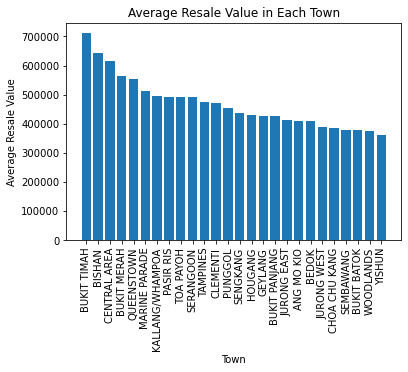
    
<details>
    <summary><b>Reveal Q5 Hint</b> (Make sure to attempt Q5 first)</summary>
    
Similar to Q2, to plot the bar chart, you should *extract the dictionary's keys (towns) and the dictionary's values (counts) into two separate python lists*. The towns serve as *x*-values while the counts as *y*-values in your bar chart.

</details>

</div>

In [ ]:
# Expected output from Q4
town_resale_average = {'BUKIT TIMAH': 710340, 'BISHAN': 642071, 'CENTRAL AREA': 617000, 'BUKIT MERAH': 563895, 'QUEENSTOWN': 555064, 'MARINE PARADE': 513160, 'KALLANG/WHAMPOA': 494174, 'PASIR RIS': 491736, 'TOA PAYOH': 490482, 'SERANGOON': 490438, 'TAMPINES': 473431, 'CLEMENTI': 471047, 'PUNGGOL': 453275, 'SENGKANG': 435548, 'HOUGANG': 431527, 'GEYLANG': 427708, 'BUKIT PANJANG': 426422, 'JURONG EAST': 413548, 'ANG MO KIO': 409744, 'BEDOK': 409303, 'JURONG WEST': 388924, 'CHOA CHU KANG': 386099, 'SEMBAWANG': 379180, 'BUKIT BATOK': 377679, 'WOODLANDS': 377002, 'YISHUN': 362941}

## Write your code below

import matplotlib.pyplot as plt

## Write your code below
towns_list = list(town_resale_average.keys())
count_of_average_resale_value = list(town_resale_average.values())

fig, ax = plt.subplots()
ax.bar(towns_list, count_of_average_resale_value)

ax.set_xticks(towns_list)
ax.set_xticklabels(towns_list, rotation=90)

ax.set_xlabel('Town')
ax.set_ylabel('Average Resale Value')
ax.set_title('Average Resale Value in Each Town')
plt.show()


Unsurprisingly, **HDB flats in central areas like Bukit Timah and Bishan have some of the highest resale values**. The convenience of living in these areas also contribute to the huge demand of BTO flats there; getting a BTO in these areas is almost like striking the lottery!

One interesting observation is the surprisingly high resale value of Punggol flats relative to other towns. While some may have the impression that Punggol flats are inaccessible and not desirable, the average resale value tells a different story. Observe that Punggol's resale value is markedly higher than areas like Ang Mo Kio and Bedok. In addition, the average resale value of Punggol flats is not that far off from matured estates like Clementi, Tampines & Serangoon.

A potential follow-up visualisation would be a time-series analysis of the Punggol HDB resale values over the years, and one might discover significant capital appreciation opportunities for Punggol BTO owners in the resale market!

<div class="alert alert-block alert-success">
<b>Marks Awarded:</b> / 2 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

2f. Question 6: Is the Lease an Important Factor in the HDB Resale Price [2 Marks]
---

<br>

<div class="alert alert-block alert-info">
    
<b>Background:</b>
    
- Some claim that HDB is an appreciating asset, yet, you often wonder how this can be true when the remaining lease period of HDB flats shortens over the years.
- You want to visualise the relationship between HDB resale prices and remaining lease periods using a line plot, to assess if lease remaining could serve as an important consideration factor when buying a HDB for investment.
    
<b>User story:</b>
- Using the data prepared for you in `average_resale_value` and `lease`, plot a line chart of the average resale price for each lease year remaining.
- Make sure to use diamond-shaped markers, and remember to set the x-axis label, y-axis label and title for your plot.
- Expected output:<br><br>

<img src='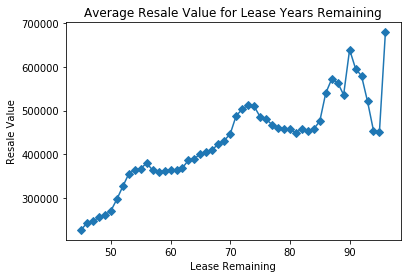
' width='350' height='200'/>
    
</div>    

In [ ]:
average_resale_for_lease_year_remaining = {45: 226042, 46: 242145, 47: 246401, 48: 254636, 49: 260232, 50: 269885, 51: 296375, 52: 325913, 53: 354740, 54: 364082, 55: 366896, 56: 379482, 57: 362915, 58: 358926, 59: 361077, 60: 363807, 61: 363912, 62: 368609, 63: 386043, 64: 389136, 65: 401178, 66: 405131, 67: 409869, 68: 423459, 69: 431147, 70: 446439, 71: 488230, 72: 502543, 73: 513224, 74: 509820, 75: 485555, 76: 480516, 77: 467435, 78: 461030, 79: 457907, 80: 458187, 81: 448684, 82: 458495, 83: 452845, 84: 457780, 85: 475330, 86: 539646, 87: 572114, 88: 563815, 89: 536062, 90: 639708, 91: 596058, 92: 579430, 93: 521120, 94: 453963, 95: 451161, 96: 679590}

lease = list(average_resale_for_lease_year_remaining.keys())
average_resale_value = list(average_resale_for_lease_year_remaining.values())

## Write your code below
fig, ax = plt.subplots()
ax.plot(lease, average_resale_value, marker='D')

ax.set_xticks(lease)
ax.set_xticklabels(lease)
plt.xticks(range(0, 101, 10))
ax.set_xlim(40,100)
ax.set_xlabel('Lease Remaining')
ax.set_ylabel('Resale Value')
ax.set_title('Average Resale Value for Lease Years Remaining')

fig.tight_layout()

plt.show()

Despite Minister Mah Bow Tan's [sweeping claim](https://omh.sg/blog/post/minister-lawrence-wongs-comments-how-story-unfolded) in 2011 that HDB is an asset that will appreciate in value over time, the above chart clearly shows that this is a flawed notion. This line plot illustrates a close correlation between the remaining lease period and the resale value of flats sold after 2017, which can be corroborated with Minister Lawrence Wong's [blog post](https://mndsingapore.wordpress.com/2017/03/24/choosing-a-home-for-life/) in March 2017. If you are looking for a resale flat, it is important to exercise caution for HDB resale flats with short leases.

Another observation from this chart is that, BTO owners who sell their flats near the Minimum Occupancy Period (MOP), with about 90 years of lease remaining, are likely to gain maximum resale value out of on their subsidised flats!

<div class="alert alert-block alert-success">
<b>Marks Awarded:</b> / 2 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

2g. Question 7: How does Floor Area Correlate with Resale Price? [3 Marks]
---

<br>

<div class="alert alert-block alert-info">
    
<b>Background:</b>
    
- You have been tasked to examine and visualise the relationship between floor area and HDB resale prices.
    
<b>User story:</b>
- Make use of iterations to extract <code>floor_area_sqm</code> & <code>resale_price</code> columns from the dataset, and use the extracted lists to chart a scatterplot of floor area (x-axis) versus resale prices (y-axis).
    - <code>floor_area_sqm</code>: dataset column index 6
    - <code>resale_price</code>: dataset column index 10
- Set the figure size of the plot to <code>figsize=(18,12)</code> *- refer to Lesson 7, part 2p (AirBnB case study)*
- Remember to set the x-axis label, y-axis label and title of your plot!
- Expected output:<br><br>
    
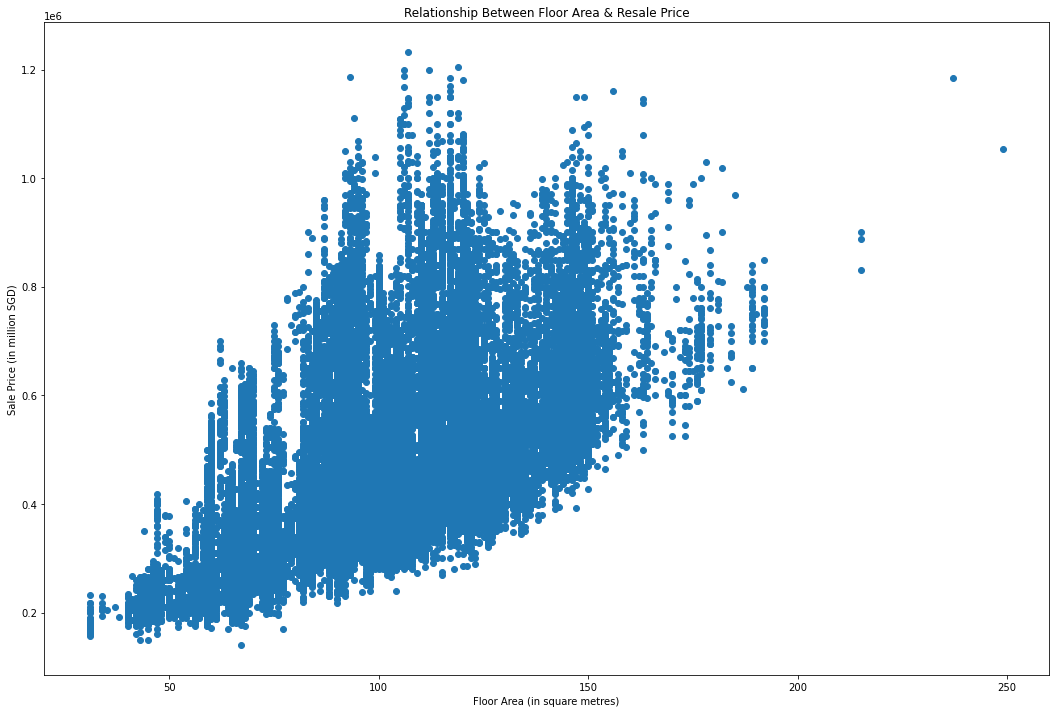
</div>

In [ ]:
hdb_resale_df.head(3)   # Using pandas to help you visualise columns in the dataset

In [ ]:
## Write your code below


floor_area_resale_price_list = hdb_resale_df.values.tolist()

def extract_column(the_list, column_number):
    
    column = []
    
    for row in the_list:
        
        column.append(row[column_number])
        
    return column

floor_area_sqm_list = extract_column(floor_area_resale_price_list, 6)
resale_price_list = extract_column(floor_area_resale_price_list, 10)



In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(18,12))
ax.scatter(floor_area_sqm_list, resale_price_list)


ax.set_xlabel("Floor Area (in square metres)")
ax.set_ylabel("Sale Price (in million SGD)")
ax.set_title("Relationship Between Floor Area & Resale Price")
ax.set_ylim(0, 1.3e6)

plt.show()




The scatterplot above shows that <b>floor area is closely and positively correlated with HDB resale prices</b>, with some variance that can likely be attributed to their locations (as investigated above). If you're looking for a large HDB flat, be prepared to pay!

<div class="alert alert-block alert-success">
<b>Marks Awarded:</b> / 3 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

2h. Question 8: Comparing Select 4 Room Flats in Singapore [2 Marks]
---
<br>

<div class="alert alert-block alert-info">
    
<b>Background:</b>
    
- You're interested in buying a 4-room flat and have shortlisted a few housing estates of interest: Punggol, Tampines, Woodlands, Clementi and Yishun. As such, you wish to investigate the price distribution of 4-room HDB resale flats in these select towns.
    
<b>User story:</b>
- We have provided some starter code that extracts lists of `4 ROOM` resale flat prices for the 5 towns.
- Use these lists to create a boxplot that illustrates the 4-room resale price distribution in these stowns: <b>Punggol, Tampines, Woodlands, Clementi and Yishun</b>. Remember to configure the x tick labels, y-axis label and title!
- Expected output:<br><br>

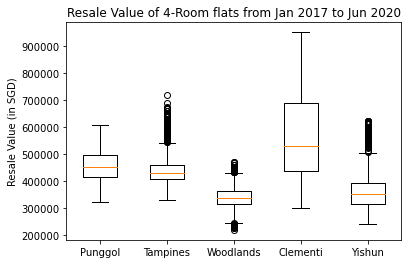
    
</div>    

In [ ]:
## This cell provides starter code that extracts 4-room resale flat prices
## in 5 towns: Punggol, Tampines, Woodlands, Clementi and Yishun.

punggol = []
tampines = []
woodlands = []
clementi = []
yishun = []

for row in hdb_resale_listings:
    
    if row[2] == '4 ROOM':
        
        town = row[1]
        
        if town == 'PUNGGOL':
            punggol.append(row[10])
            
        elif town == 'TAMPINES':
            tampines.append(row[10])
            
        elif town == 'WOODLANDS':
            woodlands.append(row[10])
            
        elif town == 'CLEMENTI':
            clementi.append(row[10])
            
        elif town == 'YISHUN':
            yishun.append(row[10])
     
    
# Print the first 5 items in each list
print(punggol[:5])
print(tampines[:5])
print(woodlands[:5])
print(clementi[:5])
print(yishun[:5])

In [ ]:
## Write your code below

fig, ax = plt.subplots()
ax.boxplot([punggol, tampines, woodlands, clementi, yishun])

ax.set_xticklabels(["Punggol", "Tampines", "Woodlands", "Clementi", "Yishun"])
ax.set_ylabel("Resale Value (in SGD)")
ax.set_title("Resale Value of 4-Room flats from Jan 2017 to Jun 2020")

plt.show()



From the boxplot, we see that **4-room resale flats in Clementi tend to cost more and can have a huge variance in price**. If you're on a very tight budget, a resale flat in Woodlands may be the optimal choice. 4-room resales flats in Punggol and Tampines have similar prices, so **it would be helpful to zoom into Punggol & Tampines estates and compare the amenities available** to specific flats and sub-areas in each town, in order to make a more informed decision.

<div class="alert alert-block alert-success">
<b>Marks Awarded:</b> / 2 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

2i. Question 9: Construct a Heatmap of all 4 room resale listings in Singapore [3 Marks]
---

<br>

<div class="alert alert-block alert-info">
    
<b>Background:</b>
     
- You have been tasked to visualise the density of 4-rooms HDB resale listings across different towns in Singapore.
    
<b>User story:</b>
- Extract a nested list of latitude and longitude data for each <code>4 ROOM</code> flat from <code>hdb_resale_listings</code>
- Use the extracted data to plot a heatmap of all 4-room resale listings in Singapore
    - Map configuration: `location=[1.357,103.826]`, `height=350`, `width=800`, `zoom_start=11.4`
    - Heatmap configuration: radius of 8 and gradient `{0.2:'blue', 0.4:'purple', 0.6:'orange', 1.0:'red'}`
- Expected output:<br>

*Note: Here is a static screenshot of the Folium map output, but your output should be interactive!*<br>
*Also, there may be slight differences in color intensity of your output (orange/red), which is usually device dependent. Rest assured that your output will be accepted as correct so long as the heatmap spots show up in about the same locations.*<br><br>
    
<img src='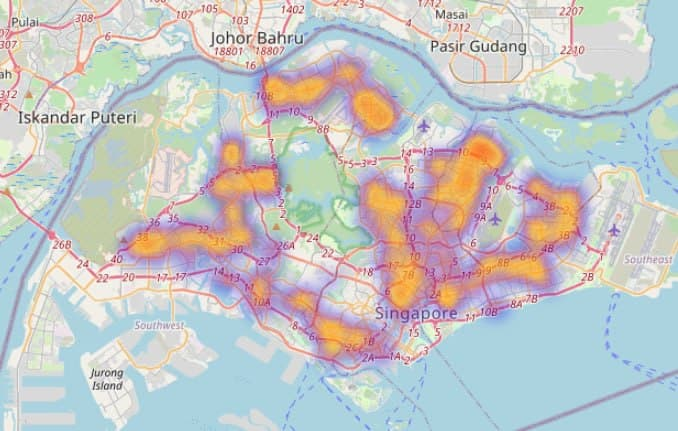
'/>
    
</div>

In [ ]:
# Import the folium library and HeatMap folium plugin here

import folium
from folium.plugins import HeatMap

## Write your code below

lat_long_4_room = []

for row in hdb_resale_listings:
    
    lat = row[-1]
    long = row[-2]
    
    if row[2] == '4 ROOM':
        
        lat_long_4_room.append([lat,long])
 

base_map = folium.Map([1.357,103.826], zoom_start=11.4)

HeatMap(lat_long_4_room, radius=8, gradient={0.2:'blue', 0.4:'purple', 0.6:'orange', 1.0:'red'}).add_to(base_map)

display(base_map)




<div class="alert alert-block alert-success">
<b>Marks Awarded:</b> / 3 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

2i. Question 10: Construct a Folium Marker Cluster of all 4 room resale listings in Singapore [5 Marks]
---

<br>

<div class="alert alert-block alert-info">
    
<b>Background:</b>
    
- You have been tasked to visualise the geographical distribution & resales prices of all 4-rooms HDB resale listings in Singapore.
    
<b>User story:</b>
- Extract a nested list of latitude and longitude data of each `4 ROOM` flat from <code>hdb_resale_listings</code>
- Extract a list of resale prices for each `4 ROOM` flat from <code>hdb_resale_listings</code>
- Use the extracted data to plot a <b>folium marker cluster</b> of all 4-room resale listings in Singapore
    - Map configuration: `location=[1.357,103.826]`, `height=550`, `width=900`, `zoom_start=11.5`
- Each of your markers should show a tooltip that reads "Click to view price" when a user hover his/her mouse over it
- When the user clicks on any marker, it should reveal the resale price of that particular flat
- Expected output:<br>

*Note: Here is a static screenshot of the Folium map output, but your output should be interactive!*<br><br>

<img src='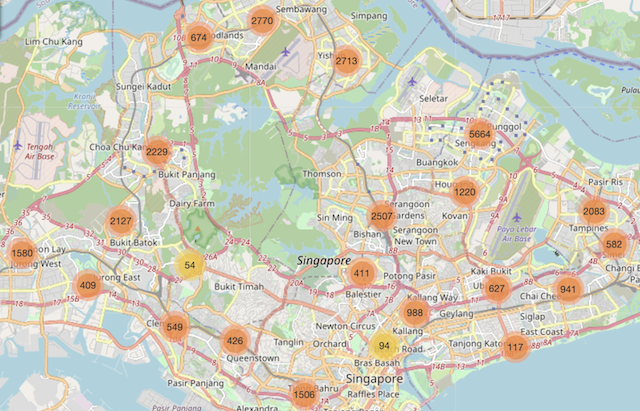
'/>
</div>

In [ ]:
# Import the MarkerCluster folium plugin
from folium.plugins import MarkerCluster

## Write your code below (Note: the Folium map output might take a while to load)

resale_price_4_room = []

for row in hdb_resale_listings:
    
    resale_price_4_room.append(row[-4])
    
base_map = folium.Map([1.357,103.826], height=550, width=900, zoom_start=11.5)

cluster = MarkerCluster().add_to(base_map)

for i in range(0,len(lat_long_4_room)):
    
    lat_long_of_single_listing = lat_long_4_room[i]
    
    price = '$' + str(resale_price_4_room[i])
    
    tooltip = 'Click to view price'
    
    folium.Marker(lat_long_of_single_listing, popup=price, tooltip=tooltip).add_to(cluster)
    
display(base_map)


<div class="alert alert-block alert-success">
<b>Marks Awarded:</b> / 5 mark
    
<b>Teaching Assistant Comment:</b>
</div>    